# Data Visualisation using Plotly
## Case Study: Netflix movies and tv series dataset

[Netflix](https://www.netflix.com/) is a streaming service <br/>
More info: [https://en.wikipedia.org/wiki/Netflix](https://en.wikipedia.org/wiki/Netflix)

In [16]:


'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

# '''Special Visualization'''
# from wordcloud import WordCloud 
# import missingno as msno

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

ModuleNotFoundError: No module named 'cufflinks'

In [4]:
'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

In [6]:
df = pd.read_csv('./dataset/netflix_titles_nov_2019.csv')
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [8]:
df = pd.read_csv('./dataset/netflix_titles_nov_2019.csv')
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0,11.0,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019.0,11.0,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019.0,11.0,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019.0,11.0,
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaT,2019,TV-Y,,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaN,NaN,2


### MOVIES AND TV SHOWS

In [14]:
'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

bold("**NETFLIX HAVE MORE MOVIES THAN TV SHOWS**")
py.iplot([pie_plot(df['type'].value_counts(), ['cyan', 'gold'], 'Content Type')])

**NETFLIX HAVE MORE MOVIES THAN TV SHOWS**

In [15]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

As we know, <font color="red">Netflix</font> works with content providers, distributors, producers, and creators to acquire licensing for TV shows and movies to stream on our service. so, the data shows <font color="red">Netflix</font> purchasing and inversting more in movies licenses for the customers.

### RATING & CONTENT TYPE

In [6]:
temp_df = df['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'MOST OF PROGRAMME ON NEYFLIX IS TV-14 & TV-MA RATED' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()



In [7]:
def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

py.iplot([pie_plot(df['rating'].value_counts(), 'Content Type')])

In [8]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['rating'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY CONTENT TYPE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

#### <font color="steelblue">TV-MA: MATURE AUDIENCE ONLY </font>
This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. This program contains one or more of the following: graphic violence (V), explicit sexual activity (S), or crude indecent language (L).

#### <font color="steelblue">TV-14: PARENTS STRONGLY CAUTIONED</font>
This program contains some material that parents would find unsuitable for children under 14 years of age. Parents are strongly urged to exercise greater care in monitoring this program and are cautioned against letting children under the age of 14 watch unattended. This program contains one or more of the following: intense violence (V), intense sexual situations (S), strong coarse language (L), or intensely suggestive dialogue (D).

**MOST POPULAR GENRES ON NETFILX ARE:**

**DOCUMENTARIES,COMEDIES, DRAMAS, INTERNATIONAL, ACTION**

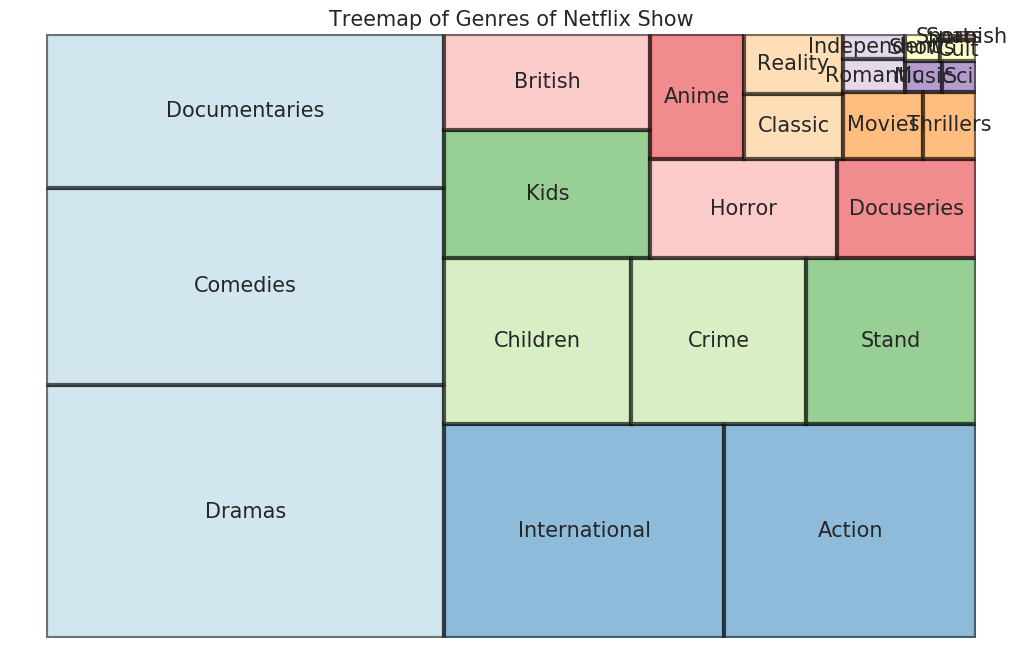

In [9]:
bold('**MOST POPULAR GENRES ON NETFILX ARE:**')
bold('**DOCUMENTARIES,COMEDIES, DRAMAS, INTERNATIONAL, ACTION**')
import squarify
df['Genres'] = df['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
temp_df = df['Genres'].value_counts().reset_index()

sizes=np.array(temp_df['Genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':15})
plt.title('Treemap of Genres of Netflix Show', fontsize = 15)
plt.axis('off')
plt.show()

<font color="royalblue">Netflix is more focusing on dramas, comedies, Documentries, international and action type of content.</font>

### RELEASE YEAR, DURATION, SEASON 

In [10]:
temp_df1 = df['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [11]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

Above plot is show deduce that <font color="red">Netflix</font> start realeasing more content from 2000 and It is showing inceasing trend over the year in the TV show as well as in the movies. These are rough estimates based on a list published by Netflix of more than 850 titles that are streamed exclusively on Netflix, including originals and first-run titles that the company syndicates and premieres in some of its markets, as of Dec. 31, 2018. Netflix also released more than 10,100 minutes of original documentaries, about 8,500 minutes of movies, 4,800 minutes of kids programming, and 3,600 minutes of stand-up comedy.

In [12]:
trace = go.Histogram(
                     x = df['duration'],
                     xbins=dict(size=0.5),
                     marker = dict(color = 'rgb(26, 118, 255)'))
layout = go.Layout(template= "plotly_dark", title = 'Distribution of Movies Duration', xaxis = dict(title = 'Minutes'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

**GREY'S ANATOMY AND NCIS HAVE HIGHEST NO. OF SEASON ON NETFLIX**

,title,director,cast,country,release_year
1109,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2018
3160,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2017


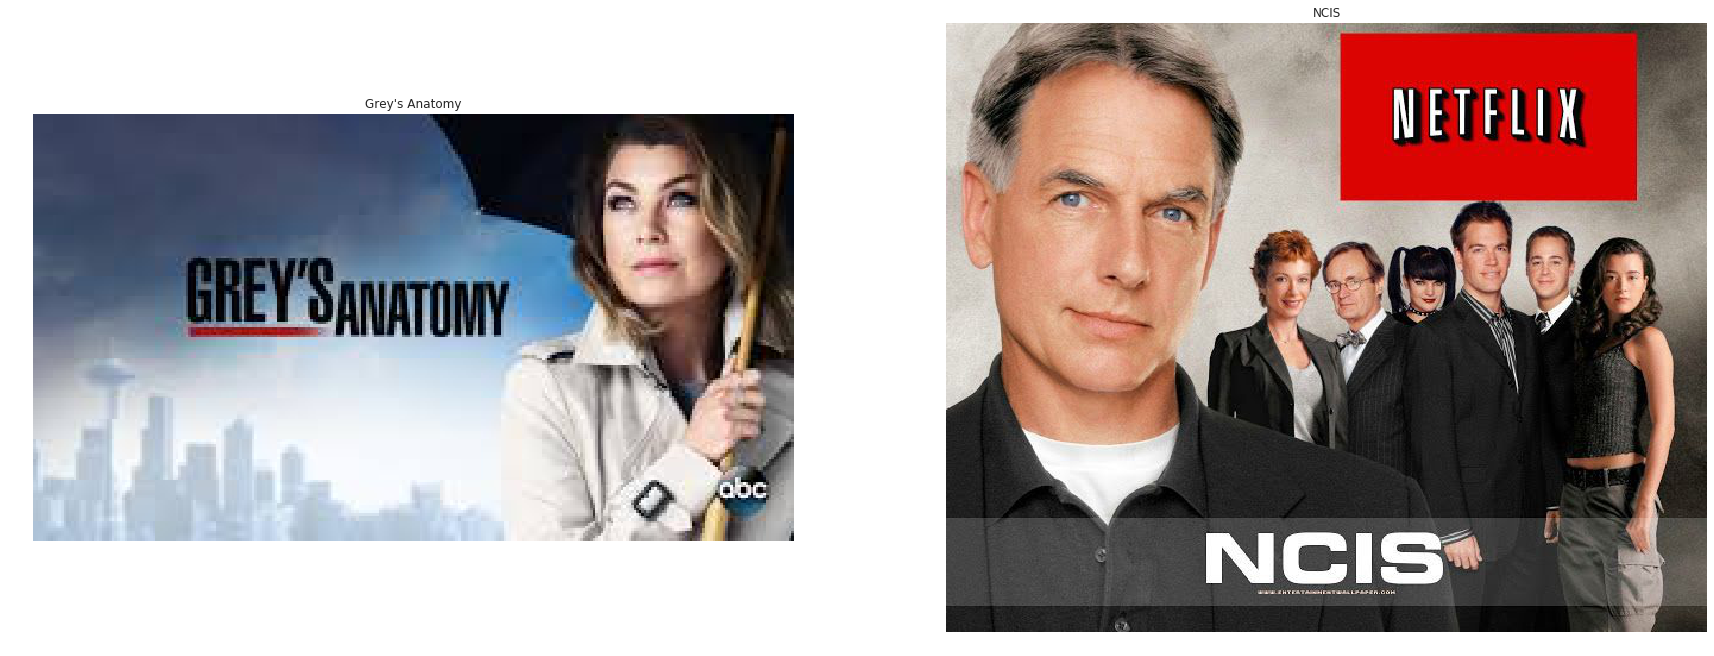

In [13]:
bold("**GREY'S ANATOMY AND NCIS HAVE HIGHEST NO. OF SEASON ON NETFLIX**")
display(df[df['season_count'] == '15'][['title','director', 'cast','country','release_year']])

# image
import urllib.request
from PIL import Image

plt.subplots(figsize=(30,60))
plt.subplot(121)
image = Image.open(urllib.request.urlopen(url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ0A6upRBYwNBw68tempa18gIxAliLNWkv60-X-fbgQ6rgQOGwC&s'))
plt.title("Grey's Anatomy")
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
image = Image.open(urllib.request.urlopen(url='https://i.pinimg.com/originals/58/dc/ba/58dcba558659a13a843c489fa29146f2.jpg'))
plt.title('NCIS')
plt.imshow(image)
plt.axis('off')
plt.show()

# plot
trace = go.Histogram(
                     x = df['season_count'],
                     marker = dict(color = 'rgb(249, 6, 6)'))
layout = go.Layout(template= "plotly_dark", title = 'Seasons of TV Shows', xaxis = dict(title = 'No. of Seasons'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

<font color="royalblue">Grey's Anatomy</font> is an American medical drama television series that premiered on March 27, 2005, on the American Broadcasting Company (ABC) as a mid-season replacement. The fictional series focuses on the lives of surgical interns, residents, and attending doctors, as they develop into seasoned doctors while trying to maintain personal lives and relationships.Grey's Anatomy was renewed for a sixteenth season which premiered on September 26, 2019. The series' success catapulted such long-running cast members as Pompeo, Dempsey, Chambers, Capshaw and Oh to worldwide recognition; they were among the top five highest-earning television actors in 2013.

<font color="royalblue">NCIS</font> is an American action police procedural television series, revolving around a fictional team of special agents from the Naval Criminal Investigative Service. The concept and characters were initially introduced in two episodes of the CBS series JAG (season eight episodes 20 and 21: "Ice Queen" and "Meltdown"). The show, a spin-off from JAG, premiered on September 23, 2003, on CBS. To date it has aired sixteen full seasons and has gone into broadcast syndication on the USA Network. Donald P. Bellisario and Don McGill are co-creators and executive producers of the premiere member of the NCIS franchise. As of 2019, it is the second-longest-running scripted, non-animated U.S. primetime TV series currently airing, surpassed only by Law & Order: Special Victims Unit (1999–present), and is the 7th-longest-running scripted U.S. primetime TV series overall.

## --More is Coming
### Thank for reading.